In [120]:
import numpy as np

class ConnectFour:
    def __init__(self):
        self.board = np.zeros((6, 7))

    def ai_move(self, ai_player, real_player, iterations = 10, num_samples=1000):
        outcomes = {key: 0 for key in np.arange(0, 7)}
        for move in np.arange(0, 7):
            copy_of_board = self.copy()
            copy_of_board.move(move, ai_player)

            if copy_of_board.check_win() == ai_player:
                return move
            
            average = 0
            for sample in np.arange(num_samples):
                sample_copy = copy_of_board.copy()

                players = [real_player, ai_player]
                player_index = 0
                for i in np.arange(iterations):
                    free_moves = self.all_free_moves()
                    if len(free_moves) == 0: break
                    random_move = np.random.choice(free_moves)
                    sample_copy.move(random_move, players[player_index])
                    
                    if player_index == 0:
                        player_index = 1
                    else:
                        player_index = 0
                average += (int(sample_copy.check_win() == ai_player) - 2 * int(sample_copy.check_win() == real_player)) / num_samples
            outcomes[move] += average

        max_score = max(outcomes.values())
        return [key for key in outcomes if outcomes[key] == max_score][0]

    def all_free_moves(self):
        moves = [i for i in np.arange(0, 7) if self.board[0, i] == 0]
        return moves

        
    def move(self, column_index, player):
        column = self.board[:, column_index]
        row_index = 0
        
        i = len(column) - 1
        for element in column[::-1]:
            if element == 0:
                row_index = i
                break
            i -= 1

        if self.board[row_index, column_index] == 0:
            self.board[row_index, column_index] = player

    def check_win(self):
        # check horizontal
        for row_index in np.arange(0, 6):
            for i in np.arange(0, 4):
                four_in_row = self.board[row_index, i : (i + 4)]
                if self.array_all_equal(four_in_row):
                    return four_in_row[0]
        # check vertical
        for column_index in np.arange(0, 7):
            for i in np.arange(0, 3):
                four_in_column = self.board[i : (i + 4), column_index]
                if self.array_all_equal(four_in_column):
                    return four_in_column[0]
        # check downward diagonal
        for row_index in np.arange(0, 3):
            for column_index in np.arange(0, 4):
                four_in_diagonal = np.array([
                    self.board[row_index][column_index],
                    self.board[row_index + 1][column_index + 1],
                    self.board[row_index + 2][column_index + 2],
                    self.board[row_index + 3][column_index + 3]
                ])
                if self.array_all_equal(four_in_diagonal):
                    return self.board[row_index][column_index]
        # check upward diagonal
        for row_index in np.arange(3, 6):
            for column_index in np.arange(0, 4):
                four_in_diagonal = np.array([
                    self.board[row_index][column_index],
                    self.board[row_index - 1][column_index + 1],
                    self.board[row_index - 2][column_index + 2],
                    self.board[row_index - 3][column_index + 3]
                ])
                if self.array_all_equal(four_in_diagonal):
                    return self.board[row_index][column_index]
        return -1 # no winner

    def array_all_equal(self, arr):
        return arr[0] != 0 and np.all(arr == arr[0])
                    
    def copy(self):
        game = ConnectFour()
        game.board = np.copy(self.board)
        return game

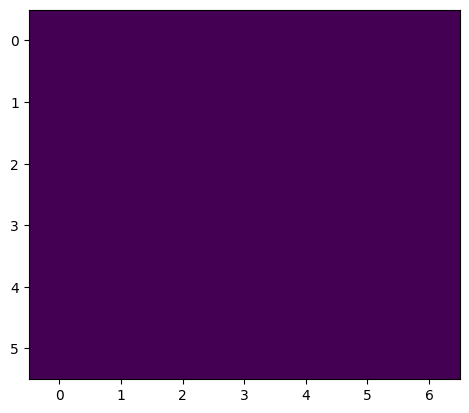

What col 1


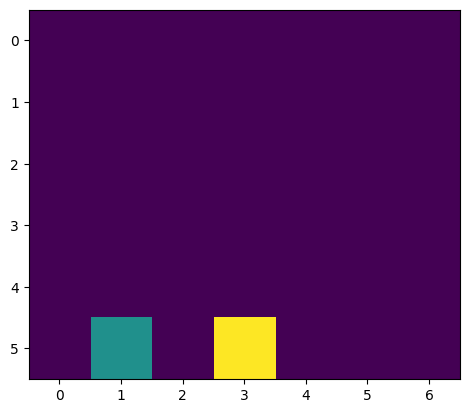

What col 3


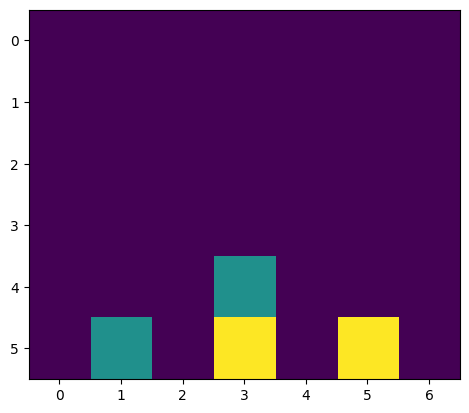

What col 4


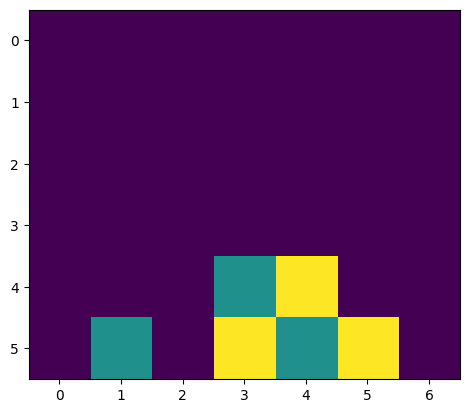

What col 4


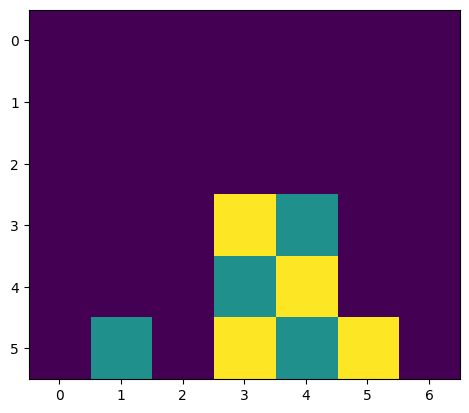

What col 3


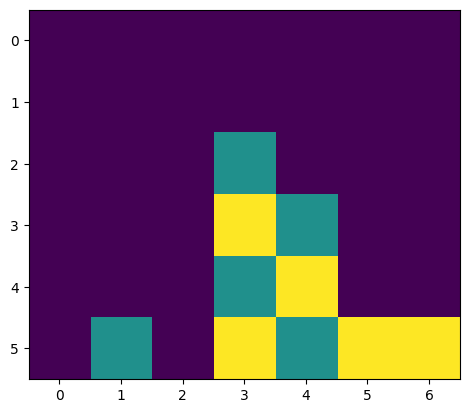

What col 5


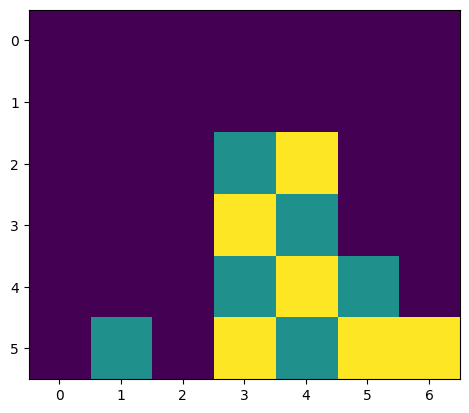

What col 4


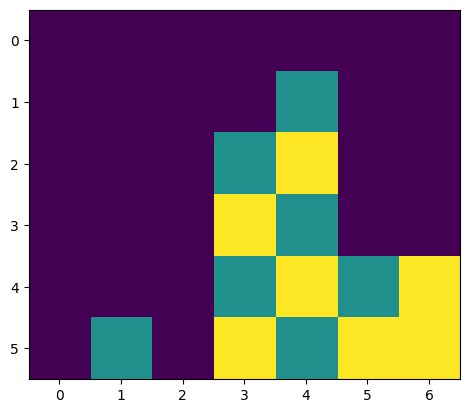

What col 6


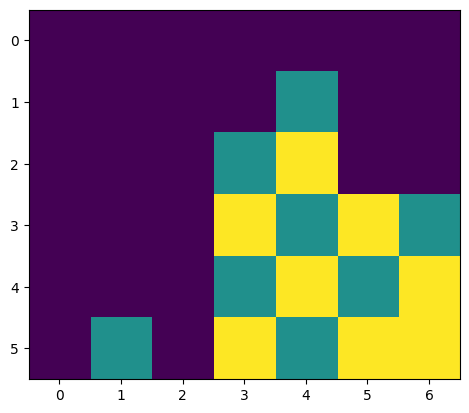

What col 3


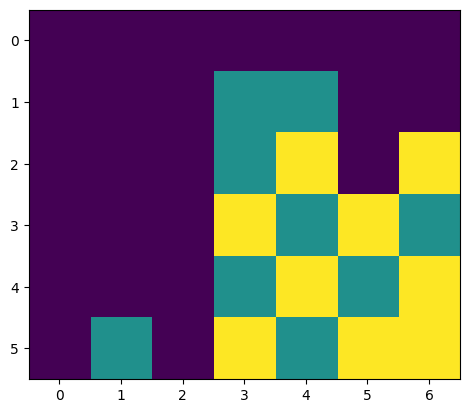

2.0


In [121]:
import matplotlib.pyplot as plt
game = ConnectFour()

score = -1
real_player = 1
ai_player = 2

while score == -1:
    plt.imshow(game.board)
    plt.show()
    column_index = int(input("What col"))
    game.move(column_index, real_player)

    if game.check_win() > -1:
        break
    
    ai_move = game.ai_move(ai_player, real_player)
    game.move(ai_move, ai_player)
    score = game.check_win()

plt.imshow(game.board)
plt.show()
print(game.check_win())